# Bubble sort

In VBA the [bubble sort](https://en.wikipedia.org/wiki/Bubble_sort) algorithm can be [written as](http://bettersolutions.com/vba/arrays/sorting-bubble-sort.htm):

```VB.NET
Sub BubbleSort(list()) 
'   Sorts an array using bubble sort algorithm
    Dim First As Integer, Last As Long 
    Dim i As Long, j As Long 
    Dim Temp As Long 
    
    First = LBound(list) 
    Last = UBound(list) 
    For i = First To Last - 1 
        For j = i + 1 To Last 
            If list(i) > list(j) Then 
                Temp = list(j) 
                list(j) = list(i) 
                list(i) = Temp 
            End If 
        Next j 
    Next i 
End Sub 
```

We can do a direct translation of this into Python:

In [1]:
def bubblesort(unsorted):
    """
    Sorts an array using bubble sort algorithm
    
    Paramters
    ---------
    
    unsorted : list
        The unsorted list
    
    Returns
    
    sorted : list
        The sorted list (in place)
    """
    
    last = len(unsorted)
    # All Python lists start from 0
    for i in range(last):
        for j in range(i+1, last):
            if unsorted[i] > unsorted[j]:
                temp = unsorted[j]
                unsorted[j] = unsorted[i]
                unsorted[i] = temp
    return unsorted

In [2]:
unsorted = [2, 4, 6, 0, 1, 3, 5]
print(bubblesort(unsorted))

[0, 1, 2, 3, 4, 5, 6]


By comparing the two codes we can see the essential changes needed:

* Python does not declare the type of the variables; the `DIM` statements are not needed.
* There is nothing special about lists or arrays as variables when passed as arguments.
* To define functions the keyword is `def` instead of `Sub`.
* To define the start of a block (the body of a function, or a loop, or a conditional) a colon `:` is used.
* To define the block itself, indentation is used. The block ends when the code indentation ends.
* Comments are either enclosed in quotes `"` as for the docstring, or using `#`.
* The return value(s) from a function use the keyword `return`, not the name of the function.
* Accessing arrays uses square brackets, not round.
* The function `range` produces a range of integers, usually used to loop over.

Note: there are in-built Python functions to sort lists which should be used in general:

In [3]:
unsorted = [2, 4, 6, 0, 1, 3, 5]
print(sorted(unsorted))

[0, 1, 2, 3, 4, 5, 6]


Note: there is a "more Pythonic" way of writing the bubble sort function, taking advantage of the feature that Python can assign to multiple things at once. Compare the internals of the loop:

In [4]:
def bubblesort(unsorted):
    """
    Sorts an array using bubble sort algorithm
    
    Paramters
    ---------
    
    unsorted : list
        The unsorted list
    
    Returns
    
    sorted : list
        The sorted list (in place)
    """
    
    last = len(unsorted)
    # All Python lists start from 0
    for i in range(last):
        for j in range(i+1, last):
            if unsorted[i] > unsorted[j]:
                unsorted[j], unsorted[i] = unsorted[i], unsorted[j]
    return unsorted

In [5]:
unsorted = [2, 4, 6, 0, 1, 3, 5]
print(bubblesort(unsorted))

[0, 1, 2, 3, 4, 5, 6]


This gets rid of the need for a temporary variable.

## Exercise

Here is a [VBA code](http://bettersolutions.com/vba/arrays/sorting-counting-sort.htm) for the [counting sort](https://en.wikipedia.org/wiki/Counting_sort) algorithm:

```VB.NET
Sub Countingsort(list) 
    Dim counts() As Long 
    Dim i As Long 
    Dim j As Long 
    Dim next_index As Long 
    Dim min, max 
    Dim min_value As Variant, max_value As Variant 

'   Allocate the counts array. VBA automatically
'   initialises all entries to 0.

    min_value = Minimum(list) 
    max_value = Maximum(list) 
    
    min = LBound(list) 
    max = UBound(list) 
    
    ReDim counts(min_value To max_value) 
    
    ' Count the values.
    For i = min To max 
        counts(list(i)) = counts(list(i)) + 1 
    Next i 

    ' Write the items back into the list array.
    next_index = min 
    For i = min_value To max_value 
        For j = 1 To counts(i) 
            list(next_index) = i 
            next_index = next_index + 1 
        Next j 
    Next i 
End Sub 

Private Function Maximum(l) 
    Dim s1, s2 
    Dim i 
    s1 = LBound(l) 
    s2 = UBound(l) 
    Maximum = l(s1) 
    For i = s1 To s2 
        If l(i) > Maximum Then Maximum = l(i) 
    Next i 
End Function 

Private Function Minimum(l) 
    Dim s1, s2 
    Dim i 
    s1 = LBound(l) 
    s2 = UBound(l) 
    Minimum = l(s1) 
    For i = s1 To s2 
        If l(i) < Minimum Then Minimum = l(i) 
    Next i 
End Function 
```

Translate this into Python. Note that the in-built Python `min` and `max` functions can be used on lists in place of the `Minimum` and `Maximum` functions above. To create a list of the correct size you can use

```python
    counts = list(range(min_value, max_value+1))
```

but this list will not contain zeros so must be reset.

In [6]:
def countingsort(unsorted):
    """
    Sorts an array using counting sort algorithm
    
    Paramters
    ---------
    
    unsorted : list
        The unsorted list
    
    Returns
    
    sorted : list
        The sorted list (in place)
    """
    # Allocate the counts array
    min_value = min(unsorted)
    max_value = max(unsorted)
    # This creates a list of the right length, but the entries are not zero, so reset
    counts = list(range(min_value, max_value+1))
    for i in range(len(counts)):
        counts[i] = 0
    # Count the values
    last = len(unsorted)
    for i in range(last):
        counts[unsorted[i]] += 1
    # Write the items back into the list array
    next_index = 0
    for i in range(min_value, max_value+1):
        for j in range(counts[i]):
            unsorted[next_index] = i
            next_index += 1
    
    return unsorted

In [7]:
unsorted = [2, 4, 6, 0, 1, 3, 5]
print(countingsort(unsorted))

[0, 1, 2, 3, 4, 5, 6]


# Simplex Method

For the linear programming problem
$$
\begin{align}
  \max x_1 + x_2 &= z \\
  2 x_1 + x_2 & \le 4 \\
  x_1 + 2 x_2 & \le 3
\end{align}
$$
where $x_1, x_2 \ge 0$, one standard approach is the [simplex method](https://en.wikipedia.org/wiki/Simplex_algorithm).

Introducing slack variables $s_1, s_2 \ge 0$ the standard tableau form becomes
$$
\begin{pmatrix}
  1 & -1 & -1 & 0 & 0 \\
  0 & 2 & 1 & 1 & 0 \\
  0 & 1 & 2 & 0 & 1 
\end{pmatrix}
\begin{pmatrix}
  z & x_1 & x_2 & s_1 & s_2
\end{pmatrix}^T = \begin{pmatrix} 0 \\ 4 \\ 3 \end{pmatrix}.
$$

The simplex method performs row operations to remove all negative numbers from the top row, at each stage choosing the smallest (in magnitude) pivot.

Assume the tableau is given in this standard form. We can use `numpy` to implement the problem.

In [3]:
import numpy

In [9]:
tableau = numpy.array([ [1, -1, -1, 0, 0, 0], 
                        [0,  2,  1, 1, 0, 4],
                        [0,  1,  2, 0, 1, 3] ], dtype=numpy.float64)
print(tableau)

[[ 1. -1. -1.  0.  0.  0.]
 [ 0.  2.  1.  1.  0.  4.]
 [ 0.  1.  2.  0.  1.  3.]]


To access an entry we use square brackets as with lists:

In [10]:
print(tableau[0, 0])
print(tableau[1, 2])
row = 2
column = 5
print(tableau[row, column])

1.0
1.0
3.0


To access a complete row or column, we use slicing notation:

In [11]:
print(tableau[row, :])
print(tableau[:, column])

[ 0.  1.  2.  0.  1.  3.]
[ 0.  4.  3.]


To apply the simplex method, we have to remove the negative entries in row `0`. These appear in columns `1` and `2`. For column `1` the pivot in row `1` has magnitude $|-1/2| = 1/2$ and the pivot in row `2` has magnitude $|-1/1|=1$. So we choose row `1`.

To perform the row operation we want to eliminate all entries in column `1` except for the diagonal, which is set to $1$:

In [12]:
column = 1
pivot_row = 1
# Rescale pivot row
tableau[pivot_row, :] /= tableau[pivot_row, column]
# Remove all entries in columns except the pivot
pivot0 = tableau[0, column] / tableau[pivot_row, column]
tableau[0, :] -= pivot0 * tableau[pivot_row, :]
pivot2 = tableau[2, column] / tableau[pivot_row, column]
tableau[2, :] -= pivot2 * tableau[pivot_row, :]

print(tableau)

[[ 1.   0.  -0.5  0.5  0.   2. ]
 [ 0.   1.   0.5  0.5  0.   2. ]
 [ 0.   0.   1.5 -0.5  1.   1. ]]


Now we repeat this on column `2`, noting that we can only pivot on row `2`:

In [13]:
column = 2
pivot_row = 2
# Rescale pivot row
tableau[pivot_row, :] /= tableau[pivot_row, column]
# Remove all entries in columns except the pivot
pivot0 = tableau[0, column] / tableau[pivot_row, column]
tableau[0, :] -= pivot0 * tableau[pivot_row, :]
pivot1 = tableau[1, column] / tableau[pivot_row, column]
tableau[1, :] -= pivot1 * tableau[pivot_row, :]

print(tableau)

[[ 1.          0.          0.          0.33333333  0.33333333  2.33333333]
 [ 0.          1.          0.          0.66666667 -0.33333333  1.66666667]
 [ 0.          0.          1.         -0.33333333  0.66666667  0.66666667]]


We read off the solution (noting that floating point representations mean we need care interpreting the results): $z = 7/3$ when $x_1 = 5/3$ and $x_2 = 2/3$:

In [14]:
print("z =", tableau[0, -1])
print("x_1 =", tableau[1, -1])
print("x_2 =", tableau[2, -1])

z = 2.33333333333
x_1 = 1.66666666667
x_2 = 0.666666666667


Let's turn that into a function.

In [15]:
def simplex(tableau):
    """
    Assuming a standard form tableau, find the solution
    """
    nvars = tableau.shape[1] - tableau.shape[0] - 1
    for column in range(1, nvars+2):
        if tableau[0, column] < 0:
            pivot_row = numpy.argmin(numpy.abs(tableau[0, column] / tableau[1:, column])) + 1
            # Rescale pivot row
            tableau[pivot_row, :] /= tableau[pivot_row, column]
            # Remove all entries in columns except the pivot
            for row in range(0, pivot_row):
                pivot = tableau[row, column] / tableau[pivot_row, column]
                tableau[row, :] -= pivot * tableau[pivot_row, :]
            for row in range(pivot_row+1, tableau.shape[0]):
                pivot = tableau[row, column] / tableau[pivot_row, column]
                tableau[row, :] -= pivot * tableau[pivot_row, :]
    z = tableau[0, -1]
    x = tableau[1:nvars+1, -1]
    return z, x

In [16]:
tableau = numpy.array([ [1, -1, -1, 0, 0, 0], 
                        [0,  2,  1, 1, 0, 4],
                        [0,  1,  2, 0, 1, 3] ], dtype=numpy.float64)
z, x = simplex(tableau)
print("z =", z)
print("x =", x)

z = 2.33333333333
x = [ 1.66666667  0.66666667]


## Building the tableau

Once the problem is phrased in the tableau form the short `simplex` function solves it without problem. However, for large problems, we don't want to type in the matrix by hand. Instead we want a way of keeping track of the objective function to maximize, and the constraints, and make the computer do all the work.

To do that we'll introduce *classes*. In VBA a class is a special module, and you access its variables and methods using dot notation. For example, if `Student` is a class, which has a variable `Name`, and `s1` is a `Student` object, then `s1.Name` is the name associated with that particular instance of student.

The same approach is used in Python:

In [17]:
class Student(object):
    
    def __init__(self, name):
        self.name = name
        
    def print_name(self):
        print("Hello", self.name)

In [18]:
s1 = Student("Christine Carpenter")
print(s1.name)
s2 = Student("Jörg Fliege")
s2.print_name()

Christine Carpenter
Hello Jörg Fliege


See how this compares to VBA.

* The `class` keyword is used to start the definition of the class.
* The name of the class (`Student`) is given. It follows similar rules and conventions to variables, but typically is capitalized.
* The name in brackets (`object`) is what the class *inherits* from. Here we use the default (`object`).
* The colon and indentation denotes the class definition, in the same way as we've seen for functions and loops.
* Functions defined inside the class are *methods*. The first argument will always be an instance of the class, and by convention is called `self`. Methods are called using `<instance>.<method>`.
* When an instance is created (eg, by `s1 = Student(...)`) the `__init__` method is called if it exists. We can use this to set up the instance.

There are a number of special methods that can be defined that work with Python operations. For example, suppose we printed the instances above:

In [19]:
print(s1)
print(s2)

This isn't very informative. However, we can define the *string representation* of our class using the `__repr__` method:

In [20]:
class Student(object):
    
    def __init__(self, name):
        self.name = name
        
    def __repr__(self):
        return self.name

In [21]:
s1 = Student("Christine Carpenter")
s2 = Student("Jörg Fliege")
print(s1)
print(s2)

Christine Carpenter
Jörg Fliege


We can also define what it means to add two instances of our class:

In [22]:
class Student(object):
    
    def __init__(self, name):
        self.name = name
        
    def __repr__(self):
        return self.name
    
    def __add__(self, other):
        return Student(self.name + " and " + other.name)

In [23]:
s1 = Student("Christine Carpenter")
s2 = Student("Jörg Fliege")
print(s1 + s2)

Christine Carpenter and Jörg Fliege


Going back to the simplex method, we want to define a class that contains the objective function and the constraints, a method to solve the problem, and a representation of the problem and solution.

In [24]:
class Constraint(object):
    def __init__(self, coefficients, value):
        self.coefficients = numpy.array(coefficients)
        self.value = value
        
    def __repr__(self):
        string = ""
        for i in range(len(self.coefficients)-1):
            string += str(self.coefficients[i]) + " x_{}".format(i+1) + " + "
        string += str(self.coefficients[-1]) + " x_{}".format(len(self.coefficients))
        string += " \le "
        string += str(self.value)
        return string

In [25]:
c1 = Constraint([2, 1], 4)
c2 = Constraint([1, 2], 3)
print(c1)
print(c2)

2 x_1 + 1 x_2 \le 4
1 x_1 + 2 x_2 \le 3


In [26]:
class Linearprog(object):
    
    def __init__(self, objective, constraints):
        self.objective = numpy.array(objective)
        self.nvars = len(self.objective)
        self.constraints = constraints
        self.nconstraints = len(self.constraints)
        self.tableau = numpy.zeros((1+self.nconstraints, 2+self.nvars+self.nconstraints))
        self.tableau[0, 0] = 1.0
        self.tableau[0, 1:1+self.nvars] = -self.objective
        for nc, c in enumerate(self.constraints):
            self.tableau[1+nc, 1:1+self.nvars] = c.coefficients
            self.tableau[1+nc, 1+self.nvars+nc] = 1.0
            self.tableau[1+nc, -1] = c.value
        self.z, self.x = self.simplex()
        
    def simplex(self):
        for column in range(1, self.nvars+2):
            if self.tableau[0, column] < 0:
                pivot_row = numpy.argmin(numpy.abs(self.tableau[0, column] / self.tableau[1:, column])) + 1
                # Rescale pivot row
                self.tableau[pivot_row, :] /= self.tableau[pivot_row, column]
                # Remove all entries in columns except the pivot
                for row in range(0, pivot_row):
                    pivot = self.tableau[row, column] / self.tableau[pivot_row, column]
                    self.tableau[row, :] -= pivot * self.tableau[pivot_row, :]
                for row in range(pivot_row+1, self.tableau.shape[0]):
                    pivot = self.tableau[row, column] / self.tableau[pivot_row, column]
                    self.tableau[row, :] -= pivot * self.tableau[pivot_row, :]
        z = self.tableau[0, -1]
        x = self.tableau[1:self.nvars+1, -1]
        return z, x

    def __repr__(self):
        string = "max "
        for i in range(len(self.objective)-1):
            string += str(self.objective[i]) + " x_{}".format(i+1) + " + "
        string += str(self.objective[-1]) + " x_{}".format(len(self.objective))
        string += "\n\nwith constraints\n"
        for c in self.constraints:
            string += "\n"
            string += c.__repr__()
        string += "\n\n"
        string += "Solution has objective function maximum of " + str(self.z)
        string += "\n\n"
        string += "at location x = " + str(self.x)
        return string

In [27]:
problem = Linearprog([1, 1], [c1, c2])
print(problem)

max 1 x_1 + 1 x_2

with constraints

2 x_1 + 1 x_2 \le 4
1 x_1 + 2 x_2 \le 3

Solution has objective function maximum of 2.33333333333

at location x = [ 1.66666667  0.66666667]


## Using libraries - `pulp`

The main advantage of using Python is the range of libraries there are that you can use to more efficiently solve your problems. For linear programming there is the [`pulp` library](https://pythonhosted.org/PuLP/), which is a Python wrapper to efficient low level libraries such as GLPK. It's worth noting that `pulp` provides high-level access to leading proprietary libraries like CPLEX, but doesn't provide the binaries or the licences. By default `pulp` uses CBC which is considerably slower: consult your supervisor as to what's suitable when for your work.

There are a [range of examples](https://pythonhosted.org/PuLP/CaseStudies/index.html) that you can look at, but we'll quickly revisit the example above. The approach is to use a lot of `pulp` defined classes, which are hopefully fairly transparent:

In [4]:
import pulp

In [29]:
problem = pulp.LpProblem("Simple problem", pulp.LpMaximize)

This gives a "meaningful" title to the problem and says if we're going to maximize or minimize.

In [30]:
x1 = pulp.LpVariable("x_1", lowBound=0, upBound=None, cat='continuous')
x2 = pulp.LpVariable("x_2", lowBound=0, upBound=None, cat='continuous')

Defining the variables again gives them "meaningful" names, and specifies their lower and upper bounds, and whether the variable type is `continuous` or `integer`. We could ignore the latter two definitions as they take their default values.

The first thing to do now is to define the objective function by "adding" it to the problem:

In [31]:
objective = x1 + x2, "Objective function to maximize"
problem += objective

Again we have given a "meaningful" name to the objective function we're maximizing. 

Next we can create constraints and add them to the problem.

In [32]:
c1 = 2 * x1 + x2 <= 4, "First constraint"
c2 = x1 + 2 * x2 <= 3, "Second constraint"
problem += c1
problem += c2

If you want to save the problem at this stage, you can use `problem.writeLP(<filename>)`, where the `.lp` extension is normally used.

To solve the problem, we just call

In [33]:
problem.solve()

1

The `1` just means it *did it*: it does not say whether it succeeded! We need to print the status:

In [34]:
print("Status:", pulp.LpStatus[problem.status])

Status: Optimal


As it's found a solution, we can print the objective function and the variables:

In [35]:
print("Maximized objective function = ", pulp.value(problem.objective))
for v in problem.variables():
    print(v.name, "=", v.varValue)

Maximized objective function =  2.33333337
x_1 = 1.6666667
x_2 = 0.66666667


Using `pulp` is far easier and robust than coding our own, and will cover a much wider range of problems.

##### Exercise

Try using pulp to implement the following optimisation problem.

Whiskas want to make their cat food out of just two ingredients: chicken and beef. These ingredients must be blended such that they meet the nutritional requirements for the food whilst minimising costs. The costs of chicken and beef are \$0.013 and \$0.008 per gram, and their nutritional contributions per gram are:

Stuff | Protein | Fat | Fibre | Salt
:-- | :-: | --:
Chicken |	0.100 |	0.080 |	0.001 |	0.002
Beef |	0.200 |	0.100 |	0.005 |	0.005

Let's define our decision variables:

$$x_1 = \text{percentage of chicken in can of cat food} $$
$$x_2 = \text{percentage of beef in can of cat food}$$
    
As these are percentages, we know that both must be $0 \leq x \leq 100$ and that they must sum to 100. The objective function to minimise costs is 
    
$$\min 0.013 x_1 + 0.008 x_2$$

The constraints (that the variables must sum to 100 and that the nutritional requirements are met) are:

$$1.000 x_1 + 1.000 x_2 = 100.0$$
$$0.100 x_1 + 0.200 x_2 \ge 8.0$$
$$0.080 x_1 + 0.100 x_2 \ge 6.0$$
$$0.001 x_1 + 0.005 x_2 \le 2.0$$
$$0.002 x_1 + 0.005 x_2 \le 0.4$$

This problem was taken from the [pulp documentation](https://pythonhosted.org/PuLP/CaseStudies/a_blending_problem.html) - you can find the solution there.

##### Further reading

There's a number of projects using `pulp` out there - one for people interested in scheduling is [Conference Scheduler](https://github.com/PyconUK/ConferenceScheduler) which works out when to put talks on, given constraints.

# Monte Carlo

One type of optimization problem deals with queues.  As an example problem we'll take the [Unilink bus](http://www.unilinkbus.co.uk) service U1C from the Airport into the centre and ask: at busy times, how many people will not be able to get on the bus, and at what stops?

If we use a fixed set of customers and want to simulate the events in time, this is an example of a *discrete event* model. An example Python Discrete Event simulator is [`ciw`](http://ciw.readthedocs.io/en/latest/), which has a [detailed set of tutorials](http://ciw.readthedocs.io/en/latest/Tutorial-I/index.html).

If we want to provide a random set of customers, to see what range of problems we may have, this is an example of Monte Carlo simulation. This can be done using standard Python random number generators, built into (for example) `numpy` and `scipy`.

We will only consider the main stops:

In [36]:
bus_stops = ["Airport Parkway Station",
             "Wessex Lane",
             "Highfield Interchange",
             "Portswood Broadway",
             "The Avenue Archers Road",
             "Civic Centre",
             "Central Station",
             "West Quay",
             "Town Quay",
             "NOCS"]

We will assume that the bus capacity is $85$ people, that $250$ people want to travel, that they are distributed at the $10$ stops following a discrete random distribution, and each wants to travel a number of stops that also follows a discrete random distribution (distributed between $1$ and the maximum number of stops they could travel).

There are smarter ways of doing it than this, I'm sure:

In [37]:
import numpy

In [38]:
capacity = 85
n_people = 250
total_stops = len(bus_stops)
initial_stops = numpy.random.randint(0, total_stops-1, n_people)
n_stops = numpy.zeros_like(initial_stops)
n_onboard = numpy.zeros((total_stops,), dtype=numpy.int)
n_left_behind = numpy.zeros_like(n_onboard)
for i in range(total_stops):
    if i == total_stops - 1: # Can only take one stop
        n_stops[initial_stops == i] = 1
    else:
        n_people_at_stop = len(initial_stops[initial_stops == i])
        n_stops[initial_stops == i] = numpy.random.randint(1, total_stops-i, n_people_at_stop)
for i in range(total_stops):
    n_people_at_stop = len(initial_stops[initial_stops == i])
    n_people_getting_on = max([0, min([n_people_at_stop, capacity - n_onboard[i]])])
    n_left_behind[i] = max([n_people_at_stop - n_people_getting_on, 0])
    for fill_stops in n_stops[initial_stops == i][:n_people_getting_on]:
        n_onboard[i:i+fill_stops] += 1

In [39]:
print(n_left_behind)

[ 0  0  0  7 22 13 13  0  0  0]


In [40]:
print(n_onboard)

[25 57 62 85 85 85 85 75 62  0]


And now that we know how to do it once, we can do it many times:

In [41]:
def mc_unilink(n_people, n_runs = 10000):
    """
    Given n_people wanting to ride the U1, use Monte Carlo to see how many are left behind on average at each stop.
    
    Parameters
    ----------
    
    n_people : int
        Total number of people wanting to use the bus
    n_runs : int
        Number of realizations
        
    Returns
    -------
    
    n_left_behind_average : array of float
        Average number of people left behind at each stop
    """
    
    bus_stops = ["Airport Parkway Station",
             "Wessex Lane",
             "Highfield Interchange",
             "Portswood Broadway",
             "The Avenue Archers Road",
             "Civic Centre",
             "Central Station",
             "West Quay",
             "Town Quay",
             "NOCS"]
    total_stops = len(bus_stops)
    capacity = 85
    
    n_left_behind = numpy.zeros((total_stops, n_runs), dtype = numpy.int)
    
    for run in range(n_runs):
        initial_stops = numpy.random.randint(0, total_stops-1, n_people)
        n_stops = numpy.zeros_like(initial_stops)
        n_onboard = numpy.zeros((total_stops,), dtype=numpy.int)
        for i in range(total_stops):
            if i == total_stops - 1: # Can only take one stop
                n_stops[initial_stops == i] = 1
            else:
                n_people_at_stop = len(initial_stops[initial_stops == i])
                n_stops[initial_stops == i] = numpy.random.randint(1, total_stops-i, n_people_at_stop)
        for i in range(total_stops):
            n_people_at_stop = len(initial_stops[initial_stops == i])
            n_people_getting_on = max([0, min([n_people_at_stop, capacity - n_onboard[i]])])
            n_left_behind[i, run] = max([n_people_at_stop - n_people_getting_on, 0])
            for fill_stops in n_stops[initial_stops == i][:n_people_getting_on]:
                n_onboard[i:i+fill_stops] += 1
                
    return numpy.mean(n_left_behind, axis=1)

In [42]:
n_left_behind_average = mc_unilink(250, 10000)

In [43]:
n_left_behind_average

array([  0.    ,   0.    ,   0.1997,   6.7655,  12.9159,  10.8201,
         6.8858,   2.1966,   0.0332,   0.    ])

We see that, as expected, it's the stops in the middle that fare worst. We can easily plot this:

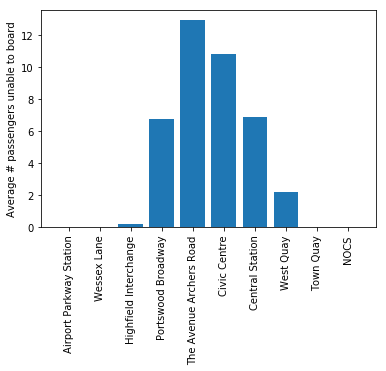

In [44]:
%matplotlib inline
from matplotlib import pyplot
x = list(range(len(n_left_behind_average)))
pyplot.bar(x, n_left_behind_average)
pyplot.xticks(x, bus_stops, rotation='vertical')
pyplot.ylabel("Average # passengers unable to board")
pyplot.show()

##### Exercise

Take a look at the discrete distributions in `scipy.stats` and work out how to improve this model.

# Machine Learning

If you want to get a computer to classify a large dataset for you, or to "learn", then packages for Machine Learning, or Neural Networks, or Deep Learning, are the place to go. This field is very much a moving target, but the Python [`scikit-learn`](http://scikit-learn.org/stable/) library has a lot of very useful tools that can be used as a starting point.

In this example we'll focus on *classification*: given a dataset that's known to fall into fixed groups, develop a model that predicts from the data what group a new data point falls within.

As a concrete example we'll use the standard [Iris data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) again, which we can get [from GitHub](https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv). We used this with `pandas`, and we can use that route to get the data in.

In [5]:
import numpy
import pandas
import sklearn

iris = pandas.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv')

A quick reminder of what the dataset contains:

In [46]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


There are different types of iris, classified by the `Name`. Each individual flower observed has four measurements, given by the data. We want to use some of the data (the Sepal Length and Width, and the Petal Length and Width) to construct a model. The model will take an observation - these four numbers - and predict which flower type we have. We'll use the rest of the data to check how accurate our model is.

First let's look at how many different types of flower there are:

In [47]:
iris['Name'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

So we're trying to choose one of three types.

The range of values can be summarized:

In [48]:
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


There's 150 observations, with a reasonable range of values.

So, let's split the dataframe into its data and its labels. What we're wanting to do here is predict the label (the type, or `Name`, of the Iris observed) from the data (the measurements of the sepal and petal).

In [49]:
labels = iris['Name']
data = iris.drop('Name', axis=1)

We then want to split our data, and associated labels, into a *training* set (where we tell the classifier what the answer is) and a *testing* set (to check the accuracy of the model):

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size = 0.5)

Here we have split the data set in two: 50% is in the training set, and 50% in the testing set.

We can now use a classification algorithm. To start, we will use a decision tree algorithm:

In [52]:
from sklearn import tree

classifier = tree.DecisionTreeClassifier()
classifier.fit(data_train, labels_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

We now have a model: given data, it will return its prediction for the label. We use the testing data to check the model:

In [53]:
print(labels_test)
print(classifier.predict(data_test))

17         Iris-setosa
55     Iris-versicolor
44         Iris-setosa
38         Iris-setosa
73     Iris-versicolor
32         Iris-setosa
28         Iris-setosa
102     Iris-virginica
148     Iris-virginica
20         Iris-setosa
77     Iris-versicolor
64     Iris-versicolor
92     Iris-versicolor
30         Iris-setosa
49         Iris-setosa
15         Iris-setosa
58     Iris-versicolor
111     Iris-virginica
19         Iris-setosa
68     Iris-versicolor
2          Iris-setosa
149     Iris-virginica
82     Iris-versicolor
118     Iris-virginica
75     Iris-versicolor
106     Iris-virginica
94     Iris-versicolor
120     Iris-virginica
18         Iris-setosa
39         Iris-setosa
            ...       
74     Iris-versicolor
101     Iris-virginica
121     Iris-virginica
54     Iris-versicolor
98     Iris-versicolor
112     Iris-virginica
145     Iris-virginica
29         Iris-setosa
138     Iris-virginica
24         Iris-setosa
72     Iris-versicolor
65     Iris-versicolor
26         

We see from the first couple of entries that it's done ok, but that there are errors. As estimating the accuracy of a classification by comparing to test data is so standard, there's a function for that:

In [54]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(labels_test, classifier.predict(data_test))
print("Decision Tree Accuracy with 50/50: {}".format(accuracy))

Decision Tree Accuracy with 50/50: 0.9466666666666667


So the result is very accurate on this simple dataset.

##### Exercises

1. Vary the size of the training / testing split to see how it affects the accuracy.
2. Try a different classifier - the `KNeighborsClassifier` for example.
3. Try a different dataset: 
    - have a go at creating a classifier for the music data we used in the data handling session. See how the accuracy changes when you exclude the pop dataset - can you think why this may be so? Does the same thing happen when we exclude other genres?
    - look at `sklearn.datasets` for possibilities, such as the [digits](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits) dataset which does handwriting recognition.

Here's a worked solution for the music data classifier. We'll start by importing the libraries and data we need.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

In [7]:
dfs = {'indie': pandas.read_csv('spotify_data/indie.csv'), 'pop': pandas.read_csv('spotify_data/pop.csv'), 
       'country': pandas.read_csv('spotify_data/country.csv'), 'metal': pandas.read_csv('spotify_data/metal.csv'), 
       'house': pandas.read_csv('spotify_data/house.csv'), 'rap': pandas.read_csv('spotify_data/rap.csv')}

In [67]:
for genre, df in dfs.items():
    df['genre'] = genre

dat = pandas.concat(dfs.values())

# define a list of the fields we want to use to train our classifier
columns = ['duration_ms', 'explicit', 'popularity', 'acousticness', 'danceability', 
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'genre']

# define data as all columns but the genre column
data = dat[columns].drop('genre', axis=1)

# define labels as the genre column
labels = dat[columns].genre

# split the data into a training set and a testing set
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size = 0.3)

# create the classifier
classifier = tree.DecisionTreeClassifier()

# train the classifier using the training data
classifier.fit(data_train, labels_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [68]:
# calculate the accuracy of the classifier using the testing data
accuracy = accuracy_score(labels_test, classifier.predict(data_test))
print("Decision Tree Accuracy with 50/50: {}".format(accuracy))

Decision Tree Accuracy with 50/50: 0.6363636363636364


The accuracy of this classifier is not great. As the `train_test_split` function randomly selects its training and test data, the accuracy will change every time you run it, but it tends to be 60-70%. Let's try excluding the pop data.

In [64]:
nopop_dat = dat[dat.genre != 'pop']

# define data as all columns but the genre column
data = nopop_dat[columns].drop('genre', axis=1)

# define labels as the genre column
labels = nopop_dat[columns].genre

data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size = 0.1)

classifier = tree.DecisionTreeClassifier()
classifier.fit(data_train, labels_train)

accuracy = accuracy_score(labels_test, classifier.predict(data_test))
print("Decision Tree Accuracy with 50/50: {}".format(accuracy))

Decision Tree Accuracy with 50/50: 0.8857142857142857


This classifier is now quite a bit more accurate - 75-85%. Generally, the accuracy of your classifier should improve the fewer categories it has to classify. 

##### Further reading

The [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html) is very detailed, provided you have some level of understanding of Machine Learning to start. Sebastian Raschke has [a book](https://github.com/rasbt/python-machine-learning-book) specifically on Python and Machine Learning. There are [other tutorials online](https://github.com/fonnesbeck/ngcm_sklearn_2017) that you may find useful.